<a href="https://colab.research.google.com/github/somas1/CT/blob/main/Capstone%201/game-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip -q install vega
import altair as alt
import plotly.express as px

!wget -q https://raw.githubusercontent.com/somas1/CT/main/Capstone%201/vgsales.csv

In [4]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
game_df = pd.read_csv('vgsales.csv')
game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
game_df.shape

(16598, 11)

In [7]:
game_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [8]:
game_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
np.sort(game_df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [10]:
game_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
game_df.sort_values('Global_Sales', ascending=False)[['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].head(25)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
game_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
game_df.groupby('Year').sum('numeric_only')

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,29826,10.59,0.67,0.00,0.12,11.38
1981.0,190488,33.40,1.96,0.00,0.32,35.77
1982.0,149186,26.92,1.65,0.00,0.31,28.86
1983.0,56759,7.76,0.80,8.10,0.14,16.79
1984.0,22911,33.28,2.10,14.27,0.70,50.36
1985.0,55505,33.73,4.74,14.56,0.92,53.94
1986.0,35986,12.50,2.84,19.81,1.93,37.07
1987.0,54701,8.46,1.41,11.63,0.20,21.74
1988.0,37181,23.87,6.59,15.76,0.99,47.22


In [14]:
game_df.groupby('Year').count()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46,46,46
1982.0,36,36,36,36,36,36,36,36,36,36
1983.0,17,17,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14,14,14
1985.0,14,14,14,14,14,14,14,14,14,14
1986.0,21,21,21,21,21,21,21,21,21,21
1987.0,16,16,16,16,16,16,16,16,16,16
1988.0,15,15,15,15,15,15,15,15,15,15


In [15]:
game_df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

<Axes: >

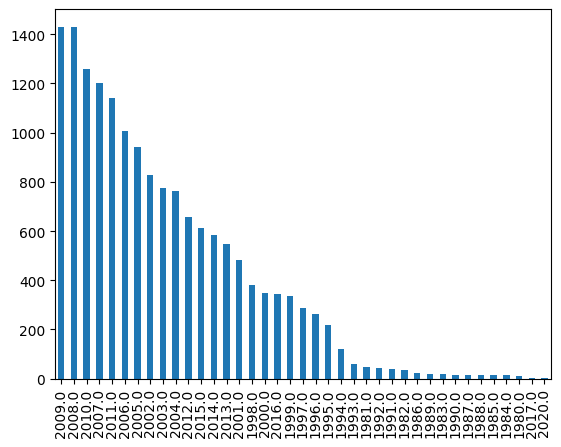

In [16]:
game_df['Year'].value_counts().plot(kind='bar')

<Axes: >

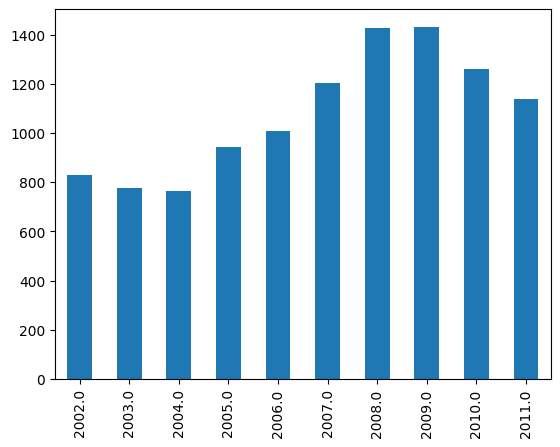

In [17]:
top_years = game_df['Year'].value_counts().nlargest(10)
top_years = top_years.sort_index()
top_years.plot(kind='bar')

<Axes: >

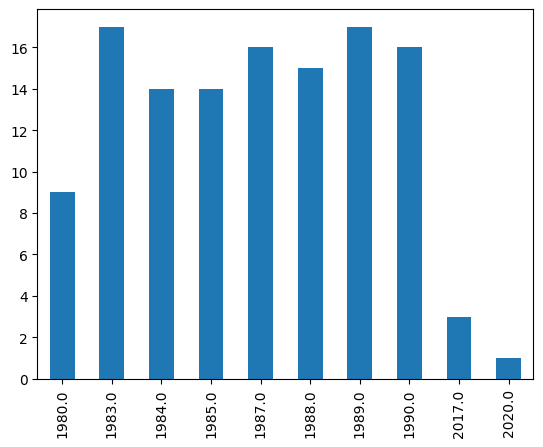

In [18]:
bottom_ten = game_df['Year'].value_counts().nsmallest(10)
bottom_ten = bottom_ten.sort_index()
bottom_ten.plot(kind='bar')

In [19]:
grouped_data = game_df.groupby('Year').sum('numeric_only')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

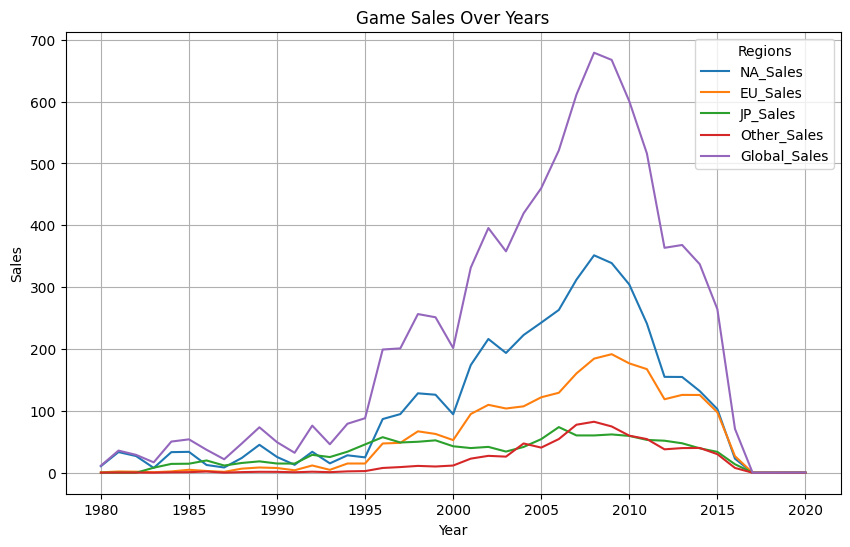

In [20]:
grouped_data.plot(kind='line', figsize=(10,6), title='Game Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Regions')
plt.grid(True)
plt.show()

In [25]:
import plotly.graph_objects as go
fig = go.Figure()

for region in grouped_data.columns:
    fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data[region], mode='lines', name=region))

fig.update_layout(
    title='Game Sales Over Years',
    xaxis_title='Year',
    yaxis_title='Sales',
    legend_title='Regions',
    showlegend=True,
    width=1000,
    height=600
)

fig.show()

In [ ]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Loop through each column and create a histogram
for column in sales_columns:
    plt.figure(figsize=(10,  6))
    game_df[column].hist(bins=75, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

    # Customize the plot
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Remove axes spines
    for side in ['right', 'top', 'left', 'bottom']:
        plt.gca().spines[side].set_visible(False)

    # Show the plot
    plt.show()
